Step 1: Load the Data and Select Two Features

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Load Dataset
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select two features (for simplicity and visualisation)
x_selected = x[['sepal length (cm)', 'petal length (cm)']]

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)

Step 2: Generate and Plot Dendrograms

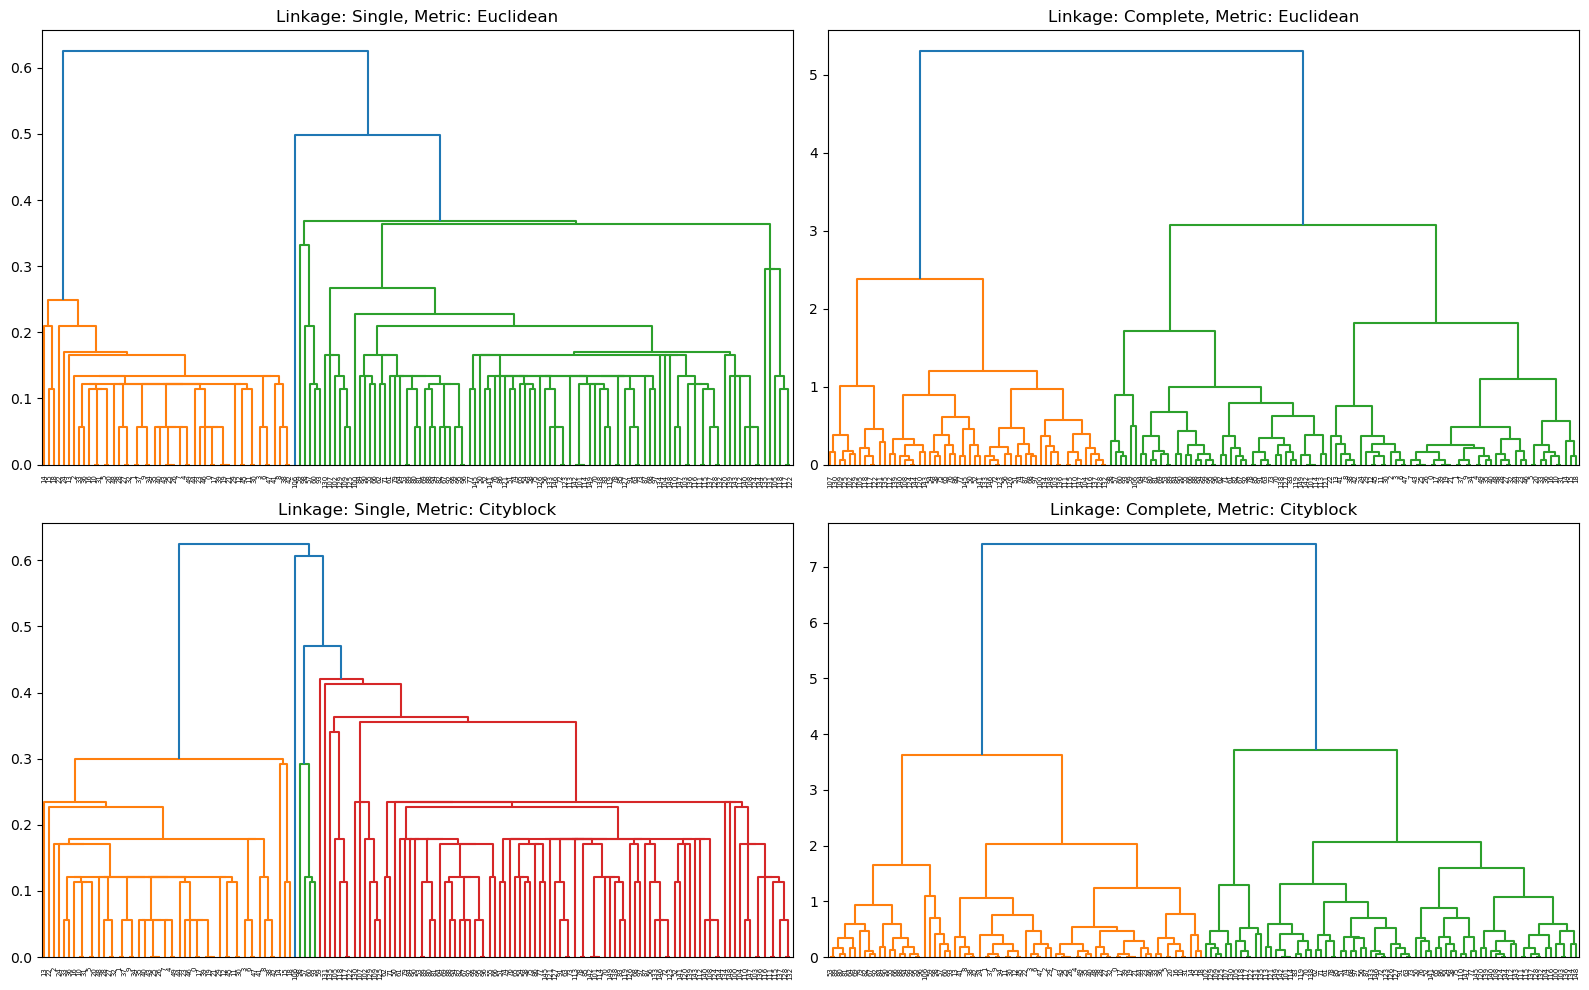

In [2]:
# Define distance metrics and linkage methods
metrics = ['euclidean', 'cityblock']
linkages = ['single', 'complete']

# Plot dendrograms
plt.figure(figsize=(16, 10))
for i, metric in enumerate(metrics):
    for j, linkage in enumerate(linkages):
        plt.subplot(2, 2, i * 2 + j + 1)
        z = sch.linkage(x_scaled, method=linkage, metric=metric)
        sch.dendrogram(z)
        plt.title(f'Linkage: {linkage.capitalize()}, Metric: {metric.capitalize()}')

plt.tight_layout()
plt.show()

Step 3: Choose one dendrogram and decide number of clusters
Complete Linkage + Euclidean Distance

Step 4: Agglomerative Hierachical Clustering

In [3]:
# Run clustering
model = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
labels = model.fit_predict(x_scaled)

/Users/aashiqebrahim/miniconda3/envs/base_env/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Step 5: Evaluate with Silhouette Score

In [4]:
# Silhouette Score
score = silhouette_score(x_scaled, labels)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.534


# Comments on Clustering Confidence
A Silhouette Score closer to 1 indicates well-defined clusters, closer to 0 means
oveerlapping, and negative indicates misclassified points.

- if score > 0.5 Good clustering
- if 0.2 < score < 0.5 Fair
- if score < 0.2 Weak separation

Based on the dendrogram of complete linkage with Euclidean distance, I selected 3 clusters. Running agglomerative hierarchical clustering with this configuration resulted in a Silhouette Score of 0.534. This indicates a moderate to strong level of separation between clusters, suggesting that the clustering solution is reasonably effective and the method chosen is appropriate for the data. 